# Quantum Computer lab 2

These lab exercises are **NOT** part of the assesment of the module, but they should be useful training for the coursework.

* This notebook introduces some of the basic quantum circuit functionality in the pennylane module
* Please run the code to make sure it works, then try the questions.



##  Goals of the lab

* Investigate quantum phase estimation using a quantulm computer simulator
* Investigate the Quantum Fourier Transform

In later labs we will investigate introducing additional errors

## Installing qiskit

There is information on installing qiskit at:  https://qiskit.org/documentation/getting_started.html
I really recommend using a virtual enviroment to install qiskit

* You can run on IBM's simulator using  https://quantum-computing.ibm.com/


##  Question Quantum Phase Estimation

The aim of this section is to numerically investigate the quantum phase estimation algorithm. This is an algorithm to estimate the eigenvalue of a unitary matrix. We will first use a simple matrix with known eigenvalues.

* Background to Quantum Phase Estimation https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm

Based on https://pennylane.ai/qml/demos/tutorial_qpe/

We want to estimate the phase $\phi$

$$
U \mid \psi \rangle = e^{2 i \pi \phi } \mid \psi \rangle
$$

We will use the two by two matrix below that depends on the parameter $\lambda$
$$
\begin{split}p(\lambda) =
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},\end{split}
$$

**Question** what are the eigenvalues and eigenvectors of $p(\lambda)$  ?

A good source of documentation on the different quantum gates in qiskit is https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html


In the circuit the controled P gate is used

$$
\begin{split}C_{p}(\lambda) =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}\end{split}
$$



## First look at the matricies

There is documentation about the different gates at: 
https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html


In [3]:
import pennylane as qml
import numpy as np

def U(wires):
    return qml.PhaseShift(2 * np.pi / 5, wires=wires)

In [4]:
dev = qml.device("default.qubit" )

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=0), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

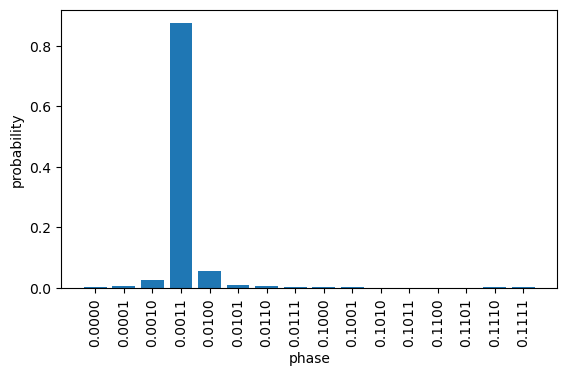

In [5]:


import matplotlib.pyplot as plt

estimation_wires = range(1, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

In [8]:
#  https://pennylane.ai/blog/2021/05/how-to-visualize-quantum-circuits-in-pennylane/

print( qml.draw(circuit_qpe))

<function circuit_qpe at 0x7dfd7b5fac00>


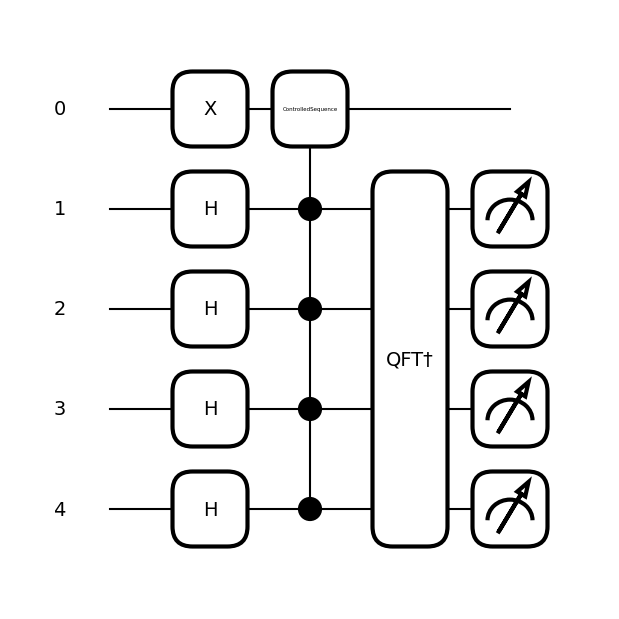

In [13]:
#  https://docs.pennylane.ai/en/stable/introduction/circuits.html

import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl( circuit_qpe)(estimation_wires)
    
plt.show()

### Function to do inverse quantum fourier transform

The result for the phase is in the form of binary decimal notation  
$ x = 0. \phi_1 \phi_2 \phi_3 $   

where $\phi_j$ is 1 or  0

$x = \phi_1 / 2 + \phi_2 / 4 + \phi_3 / 8 $ 


### Questions

The goal of this question is to study the quantum phase algorithm with a simple matrix with known eigenvalues
and eigenvectors. When you get a numerical result back, you should compare it with the known eigenvalues.

Run the above circuit for angle = $2 \pi / 2$ , $2 \pi / 4$  , $2 \pi / 8$.
Can you understand the result.

Run the code for angle = $2 \pi / 3$. What do you notice?

Comment out the line qpe2.x(3).  Do you agree with the result?

Change the line qpe2.x(3) to qpe2.h(3). Run the code for angle = $2 \pi / 2$ , $2 \pi / 4$  , $2 \pi / 8$, $2 \pi / 3$.
What do you notice


## Question

On the web page https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb
there is an example of a code that uses 6 counting bits. By studying this code write a function that does quantum phase estimation using
an input number of counting bits. Also make the angle an argument of the function.

Study the accuracy of the result as a function of counting bits for the angle $2\pi/3$. Using a large number of counting bits may require a
lot of memory so be careful. 



In [65]:
def find_quantum_phase(no_count_bits, angle) :
     print("Number of counting bits " , no_count_bits)
     print("Input angle = " , angle )
    

## Bonus Question

This is a mini-project type question. The test matrix we used was a simple diagonal matrix. It would be interesting to modify the code to use a non-diagonal matrix, such as a U-gate.

\begin{split}U(\theta, \phi, \lambda) =
    \begin{pmatrix}
        \cos\left(\frac{\theta}{2}\right)          & -e^{i\lambda}\sin\left(\frac{\theta}{2}\right) \\
        e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
    \end{pmatrix}\end{split}

The code below creates the matrix and computes the eigenvalues with standard python. This can be used to compare the results
from the phase estimation.


https://docs.pennylane.ai/en/stable/code/api/pennylane.QuantumPhaseEstimation.html

In [34]:
import pennylane as qml
from pennylane.templates import QuantumPhaseEstimation
from pennylane import numpy as np

phase = 5
target_wires = [0]
unitary = qml.RX(phase, wires=0).matrix()

In [45]:
n_estimation_wires = 5
estimation_wires = range(1, n_estimation_wires + 1)

dev = qml.device("default.qubit", wires=n_estimation_wires + 1)

@qml.qnode(dev)
def circuit():
    # Start in the |+> eigenstate of the unitary
    qml.Hadamard(wires=target_wires)

    QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )

    return qml.probs(estimation_wires)

phase_estimated = np.argmax(circuit()) / 2 ** n_estimation_wires

# Need to rescale phase due to convention of RX gate
#phase_estimated = 4 * np.pi * (1 - phase_estimated)

print(phase_estimated )

0.21875


In [46]:
print(unitary)

[[0.28366219+0.j         0.        +0.95892427j]
 [0.        +0.95892427j 0.28366219+0.j        ]]


In [47]:
import numpy as np
from numpy import linalg as LA
import cmath
import math

eigenvalues, eigenvectors = LA.eig(unitary)

for e_ in eigenvalues :
#    p = (cmath.phase(e_)  + math.pi ) / (2.0 * math.pi )
    p = (cmath.phase(e_) ) 
    p = (cmath.phase(e_)  ) / (2.0 * math.pi )
    print(e_, "phase = ", p )

print("  ")
print(eigenvectors)
print(" ")

#print( qml.RX(phase, wires=0).eigvals() )

(0.2836621854632262+0.9589242746631385j) phase =  0.20422528454052333
(0.28366218546322625-0.9589242746631386j) phase =  -0.20422528454052333
  
[[ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678-7.06783833e-17j]]
 


## Quantum Fourier Transform

Based on the material from  https://pennylane.ai/qml/demos/tutorial_qft/


In [14]:
from scipy.linalg import dft
import pennylane as qml
import numpy as np

n = 2

print("DFT matrix for n = 2:\n")
print(np.round(1 / np.sqrt(2 ** n) * dft(2 ** n), 2))

qft_inverse = qml.adjoint(qml.QFT([0,1]))

print("\n inverse QFT matrix for n = 2:\n")
print(np.round(qft_inverse.matrix(), 2))

DFT matrix for n = 2:

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5-0.j  -0. +0.5j]
 [ 0.5+0.j  -0.5-0.j   0.5+0.j  -0.5-0.j ]
 [ 0.5+0.j  -0. +0.5j -0.5-0.j   0. -0.5j]]

 inverse QFT matrix for n = 2:

[[ 0.5-0.j   0.5-0.j   0.5-0.j   0.5-0.j ]
 [ 0.5-0.j   0. -0.5j -0.5-0.j   0. +0.5j]
 [ 0.5-0.j  -0.5-0.j   0.5-0.j  -0.5-0.j ]
 [ 0.5-0.j   0. +0.5j -0.5-0.j   0. -0.5j]]
